In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor

In [30]:
Housing_Price = pd.read_csv('House.csv')
Housing_Price.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [32]:
print(Housing_Price.dtypes)
Housing_Price.isnull().sum()

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

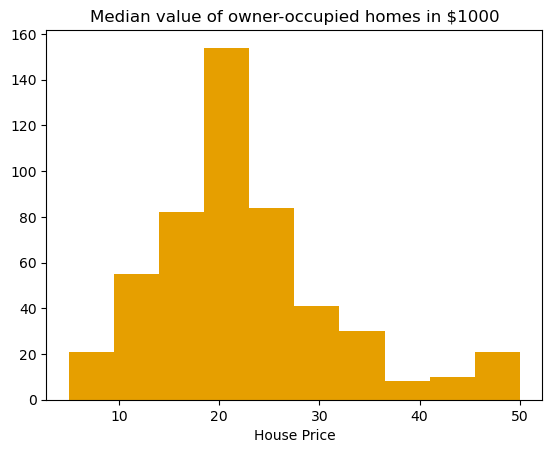

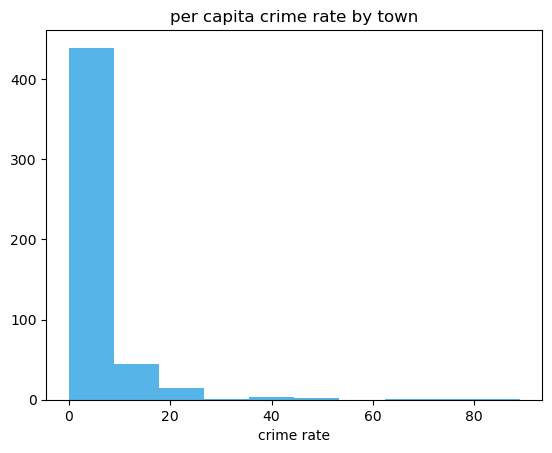

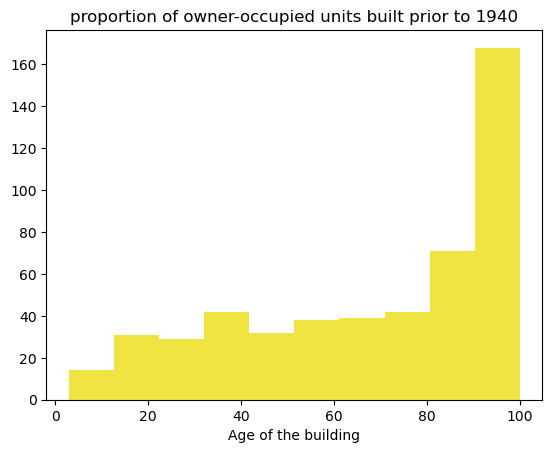

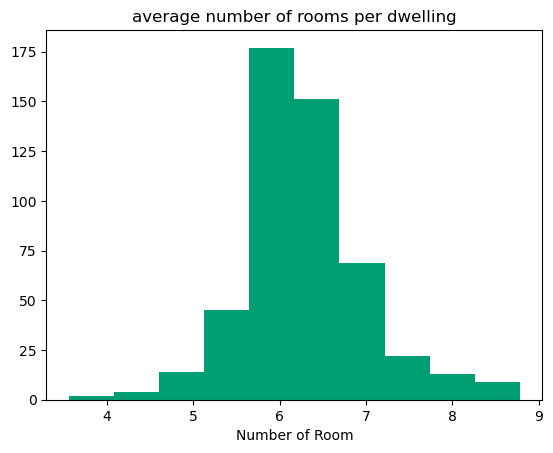

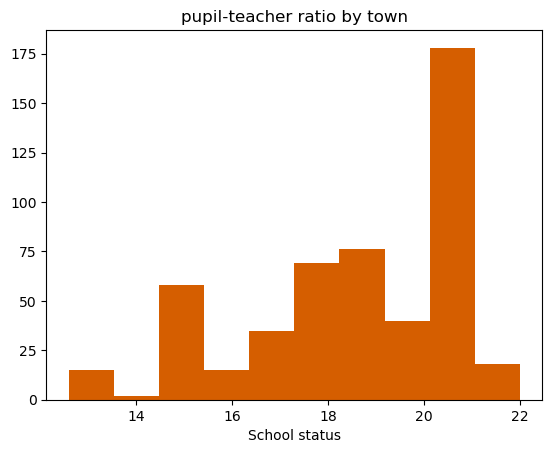

In [4]:
plt.hist(Housing_Price['MEDV'], color = '#E69F00')
plt.xlabel('House Price')
plt.title('Median value of owner-occupied homes in $1000')
plt.show()

plt.hist(Housing_Price['CRIM'], color = '#56B4E9')
plt.xlabel('crime rate')
plt.title('per capita crime rate by town')
plt.show()

plt.hist(Housing_Price['AGE'], color = '#F0E442')
plt.xlabel('Age of the building')
plt.title('proportion of owner-occupied units built prior to 1940')
plt.show()

plt.hist(Housing_Price['RM'], color = '#009E73')
plt.xlabel('Number of Room')
plt.title('average number of rooms per dwelling')
plt.show()

plt.hist(Housing_Price['PTRATIO'], color = '#D55E00')
plt.xlabel('School status')
plt.title('pupil-teacher ratio by town')
plt.show()

5.0
15.0
8
8.825000000000001


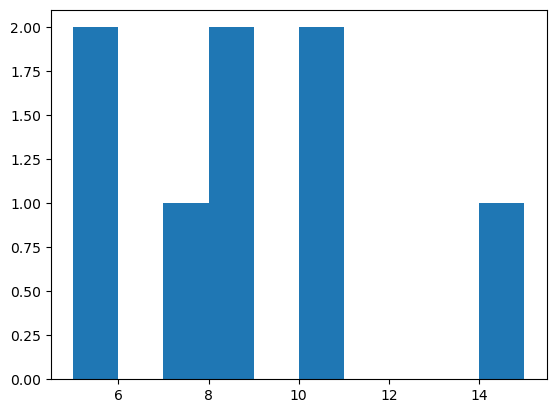

In [33]:
Outlier_Crim = Housing_Price['MEDV'][Housing_Price['CRIM'] > 30]
print(min(Outlier_Crim))
print(max(Outlier_Crim))
print(len(Outlier_Crim))
print(sum(Outlier_Crim)/len(Outlier_Crim))
plt.hist(Outlier_Crim)
plt.show()

In [14]:
print(len(Housing_Price))
Housing_Price_New = Housing_Price.drop(Housing_Price.index[Housing_Price['CRIM'] > 30])
len(Housing_Price_New)

506


498

<Axes: >

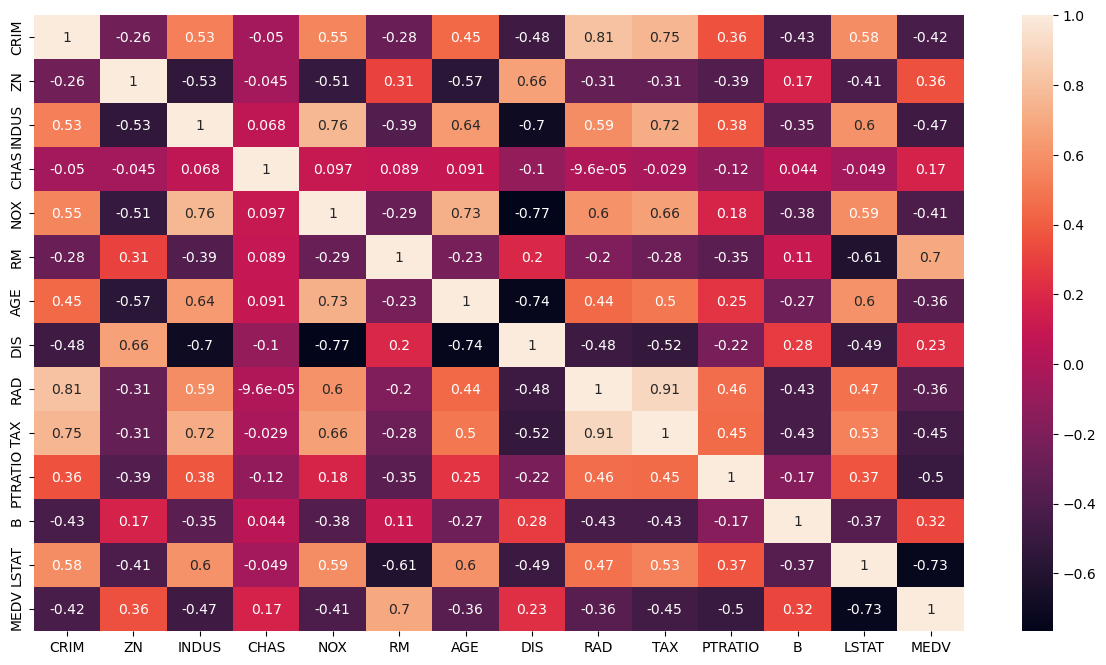

In [7]:
plt.figure(figsize= (15, 8))
x = sns.heatmap(Housing_Price_New.corr(), annot = True)
x

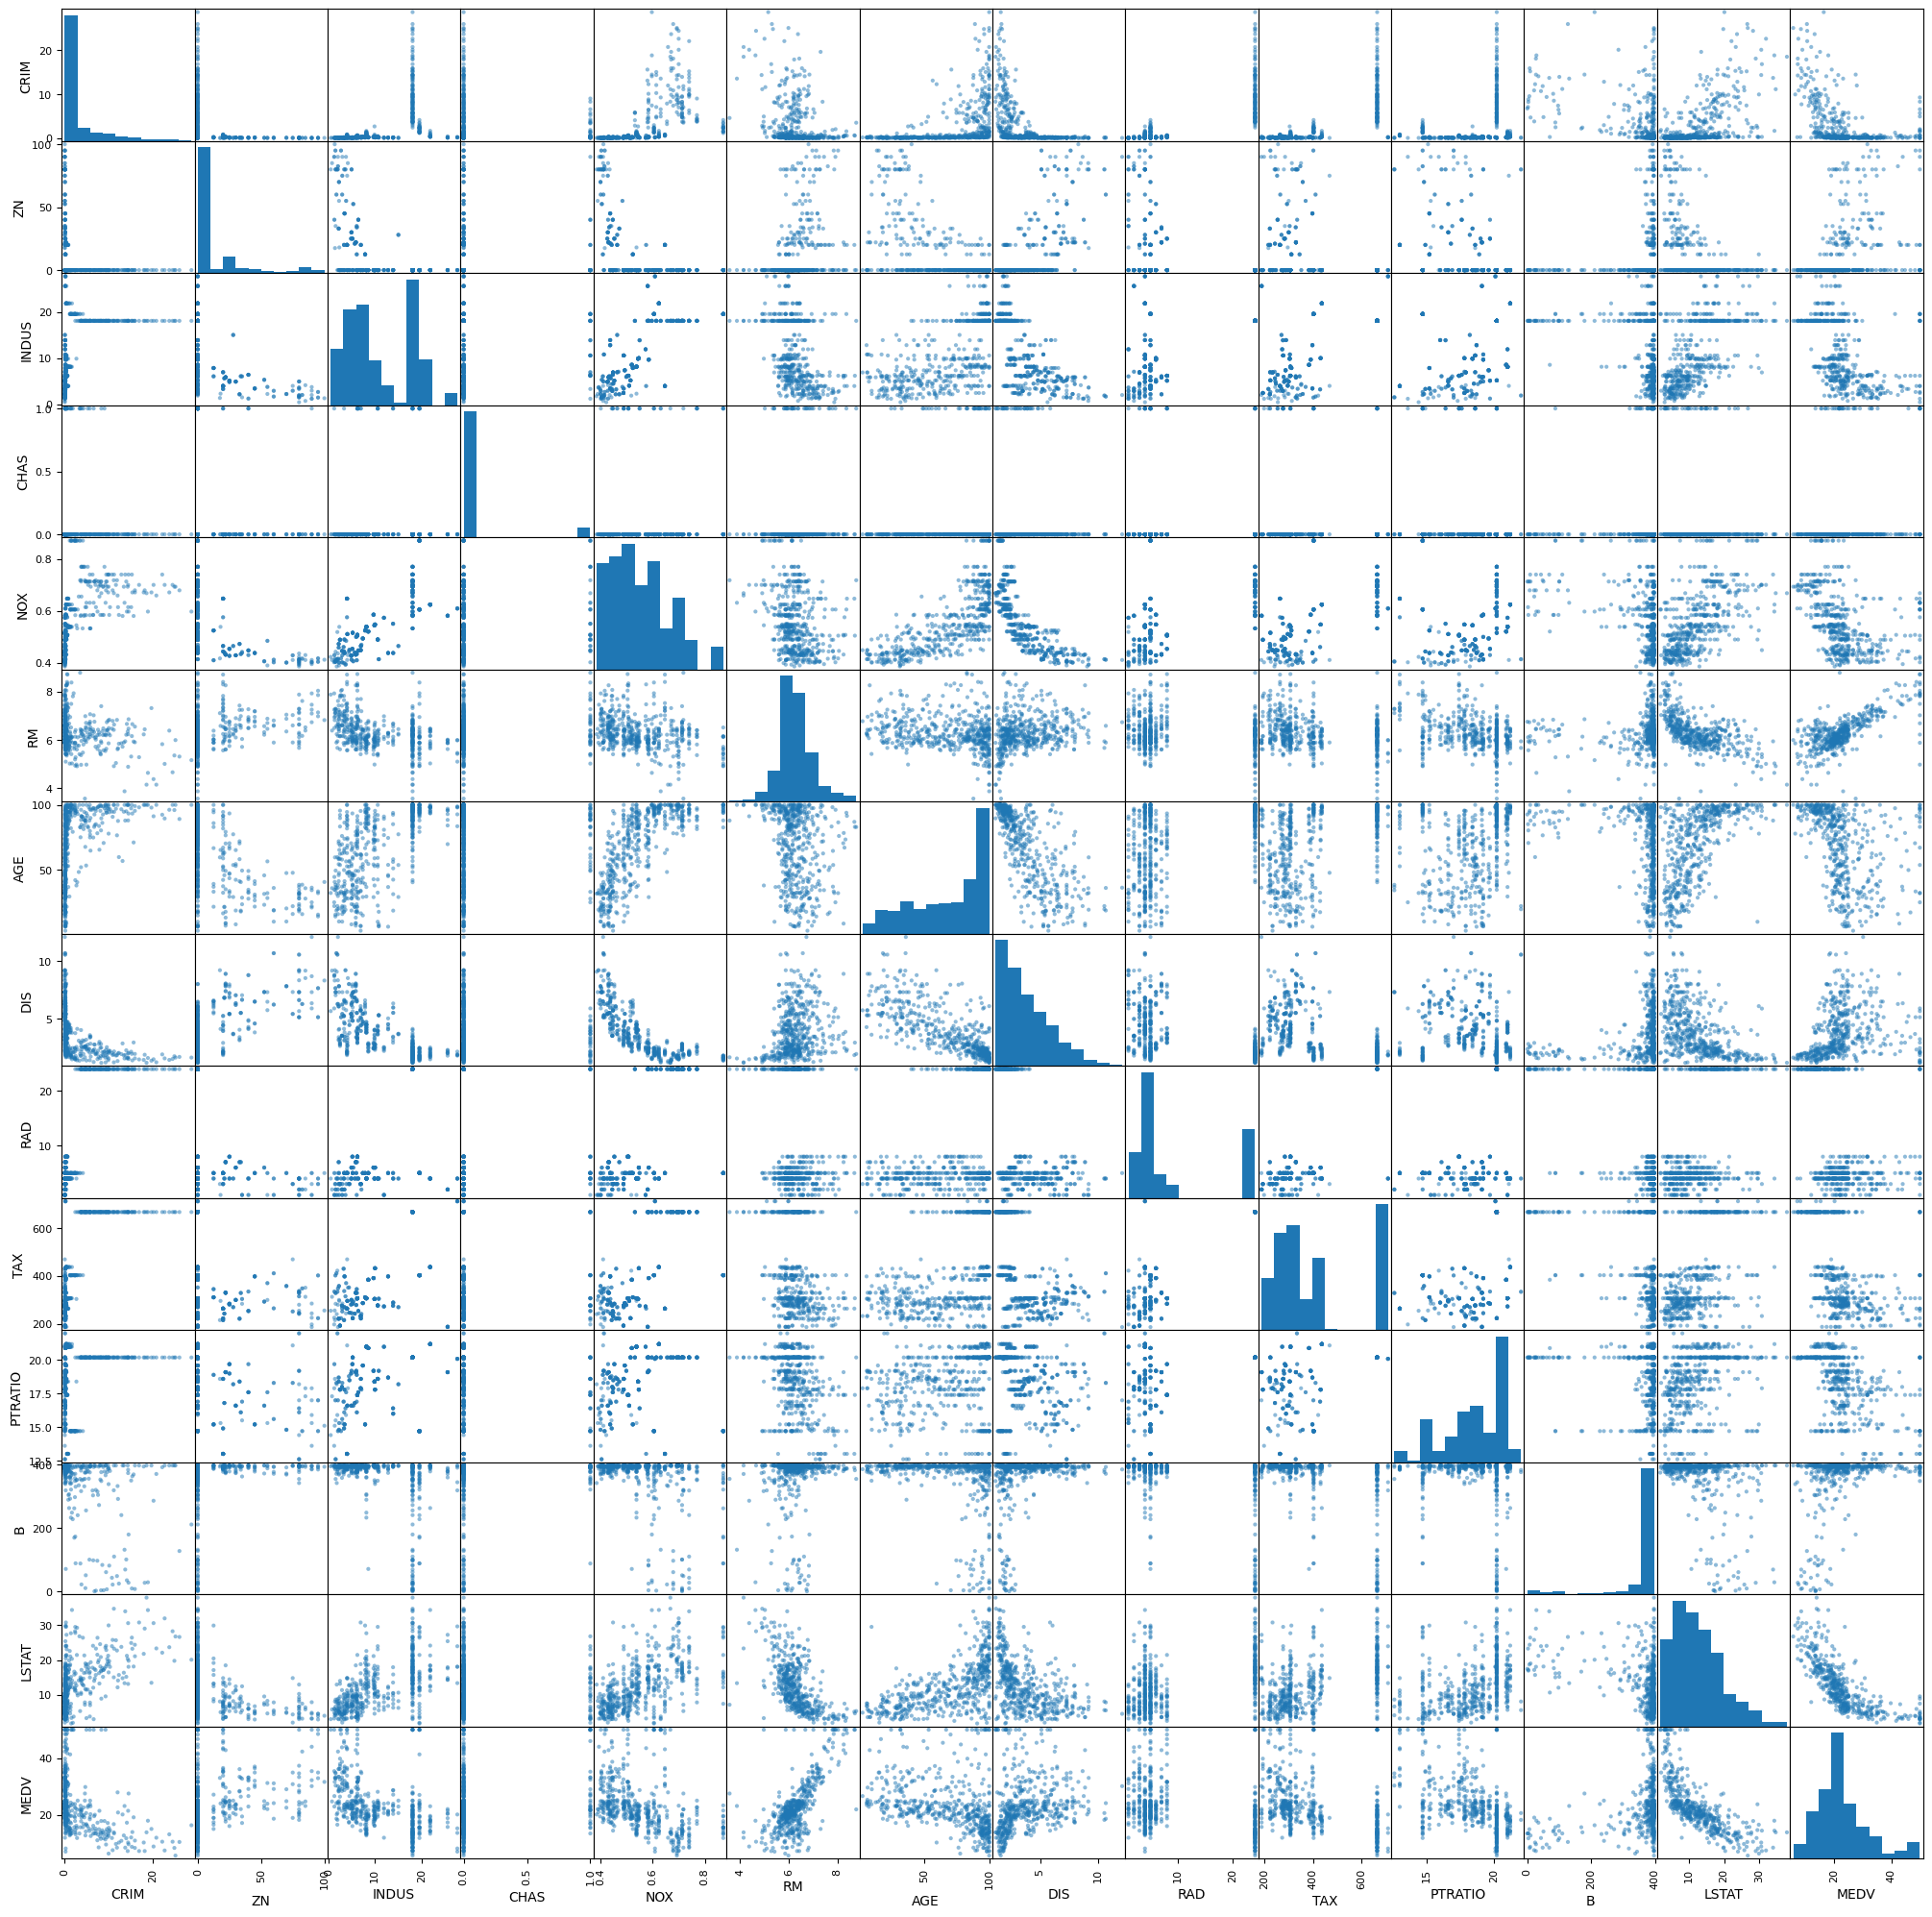

In [14]:
scatter_matrix(Housing_Price_New, figsize = (25, 25))
plt.show()


In [34]:
x = Housing_Price_New.corr()
x


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.261322,0.528950,0.551697,-0.283853,0.447286,-0.475818,0.808854,0.753802,0.362379,-0.426000,0.581619,-0.423837
ZN,-0.261322,1.000000,-0.531299,-0.514198,0.310233,-0.567630,0.663376,-0.306373,-0.309022,-0.388131,0.171866,-0.413840,0.356180
INDUS,0.528950,-0.531299,1.000000,0.760009,-0.387032,0.639796,-0.702975,0.585920,0.715208,0.375156,-0.351118,0.601956,-0.472188
NOX,0.551697,-0.514198,0.760009,1.000000,-0.294887,0.728421,-0.765694,0.602714,0.661067,0.178063,-0.379490,0.585023,-0.412814
RM,-0.283853,0.310233,-0.387032,-0.294887,1.000000,-0.231924,0.196699,-0.196439,-0.282130,-0.351611,0.110161,-0.607318,0.696351
AGE,0.447286,-0.567630,0.639796,0.728421,-0.231924,1.000000,-0.744331,0.444633,0.496866,0.252772,-0.265179,0.600628,-0.364031
DIS,-0.475818,0.663376,-0.702975,-0.765694,0.196699,-0.744331,1.000000,-0.481558,-0.523128,-0.221996,0.282156,-0.490937,0.231151
RAD,0.808854,-0.306373,0.585920,0.602714,-0.196439,0.444633,-0.481558,1.000000,0.906539,0.455768,-0.431927,0.474564,-0.356410
TAX,0.753802,-0.309022,0.715208,0.661067,-0.282130,0.496866,-0.523128,0.906539,1.000000,0.451929,-0.431386,0.533874,-0.448722
PTRATIO,0.362379,-0.388131,0.375156,0.178063,-0.351611,0.252772,-0.221996,0.455768,0.451929,1.000000,-0.165334,0.367668,-0.500522


In [17]:
Housing_Price.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [38]:
del Housing_Price_New['CHAS']
x = Housing_Price_New.iloc[:, 0:12]
y = Housing_Price_New['MEDV']


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 498, dtype: float64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y)
tree = DecisionTreeRegressor().fit(X_train,y_train)
print("Test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Test set accuracy: 0.822


In [52]:
dtree = tree.predict(x)
dtree


array([24. , 22.9, 34.7, 33.4, 33.4, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 20.4, 22.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       13.1, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 25.1, 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 20. , 17.4, 16.6, 16.5, 17.8, 20.5, 20.5, 25. , 20.5, 18.9,
       35.4, 24.6, 31.6, 23.3, 18.2, 18.7, 18.9, 22.2, 25. , 33. , 23.5,
       20. , 22. , 17.4, 22. , 22.1, 21.7, 22.1, 22.1, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 22.3, 21.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 23.3, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 19.6, 19.5, 19.5, 18.6, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 17.4, 22.5,
       20.3, 20.5, 18.8, 18.8, 20.5, 18.8, 15.2, 17.4, 14.3, 23.1, 19.6,
       23. , 18.4, 15.2, 18.1, 17.4, 17.1, 14.4, 17.8, 14. , 14.4, 15.6,
       15.6, 11.8, 13.8, 13.1, 14.6, 17.8, 15.4, 21

In [53]:
R = y - dtree

print(np.mean(abs(R)))
R

0.6315261044176707


0      0.0
1     -1.3
2      0.0
3      0.0
4      2.8
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: MEDV, Length: 498, dtype: float64

In [56]:
percentageerror_tree=((y-dtree)/dtree)*100
percentageerror_tree



0      0.000000
1     -5.676856
2      0.000000
3      0.000000
4      8.383234
         ...   
501    0.000000
502    0.000000
503    0.000000
504    0.000000
505    0.000000
Name: MEDV, Length: 498, dtype: float64

In [57]:
np.mean(abs(percentageerror_tree))

3.359613124622962

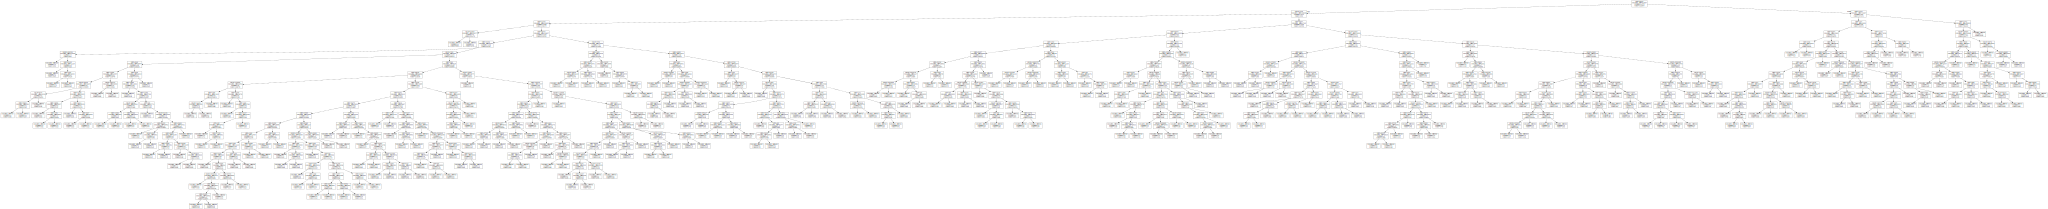

In [58]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot")
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)